In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import AvgPool2D,MaxPool2D,Dense
from keras.layers import Activation,Dropout,BatchNormalization,Flatten
from keras.optimizers import Adam,SGD,RMSprop


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

In [16]:
data='/kaggle/input/covid-19-x-ray-10000-images/dataset'

In [17]:
os.listdir(data)

['normal', 'covid']

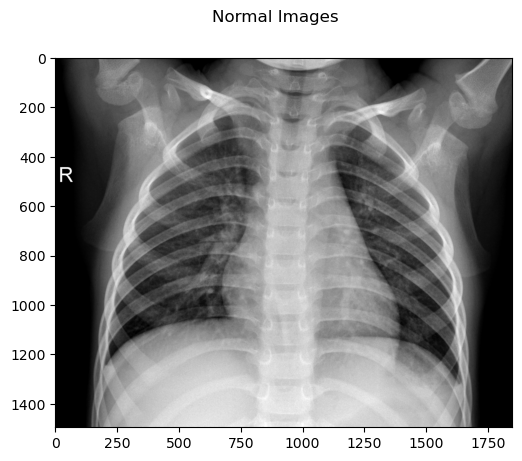

In [18]:
normal_images=[]
for img_path in glob.glob(data + '/normal/*'):
    normal_images.append(mping.imread(img_path))
fig=plt.figure()
fig.suptitle('Normal Images')
plt.imshow(normal_images[0],cmap='gray')

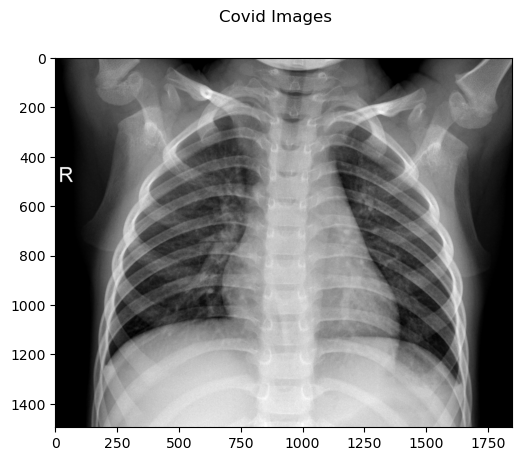

In [19]:
covid_images=[]
for img_path in glob.glob(data + '/normal/*'):
    covid_images.append(mping.imread(img_path))
fig=plt.figure()
fig.suptitle('Covid Images')
plt.imshow(covid_images[0],cmap='gray')

In [20]:
Images_width=150
Images_Height=150
Cannels=3
INPUT_SHAPE=(Images_width,Images_Height,Cannels)
NB_CLASSES=2
EPOCHS=45
BATCH_SIZE=6

In [21]:
model=Sequential()
model.add(Conv2D(22,(3,3),input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 22)      616       
                                                                 
 activation_13 (Activation)  (None, 148, 148, 22)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 22)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        12736     
                                                                 
 activation_14 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 70, 70, 256)       147712    
                                                      

In [22]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",metrics=("accuracy"))


In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Images_Height, Images_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Images_Height, Images_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


/tmp/ipykernel_32/72305497.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/45
12/12 [==============================] - 15s 1s/step - loss: 0.6783 - accuracy: 0.6765 - val_loss: 0.6380 - val_accuracy: 0.7083
Epoch 2/45
12/12 [==============================] - 12s 962ms/step - loss: 0.6458 - accuracy: 0.7059 - val_loss: 0.6382 - val_accuracy: 0.7083
Epoch 3/45
12/12 [==============================] - 12s 1s/step - loss: 0.5784 - accuracy: 0.7361 - val_loss: 0.2936 - val_accuracy: 0.9167
Epoch 4/45
12/12 [==============================] - 12s 958ms/step - loss: 0.5302 - accuracy: 0.8235 - val_loss: 0.6270 - val_accuracy: 0.7083
Epoch 5/45
12/12 [==============================] - 12s 1s/step - loss: 0.5790 - accuracy: 0.7206 - val_loss: 0.5904 - val_accuracy: 0.7083
Epoch 6/45
12/12 [==============================] - 12s 975ms/step - loss: 0.5281 - accuracy: 0.7647 - val_loss: 0.5424 - val_accuracy: 0.7083
Epoch 7/45
12/12 [==============================] - 12s 960ms/step - loss: 0.5868 - accuracy: 0.7647 - val_loss: 0.3789 - val_accuracy: 0.8333
Epoch 8/

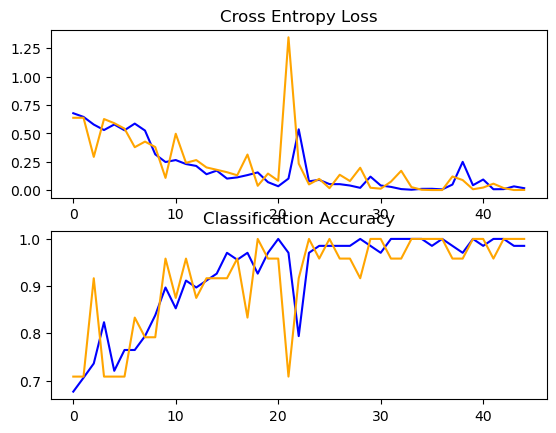

In [26]:
from matplotlib import pyplot as plt
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label= 'train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')
plt.show()